In [1]:
import os
import pandas as pd
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer('bert-base-nli-mean-tokens')

import re
import preprocessor as p
from sklearn.cluster import KMeans

ModuleNotFoundError: No module named 'preprocessor'

In [2]:
df = pd.read_csv('Copy of For_Simon_G.csv',encoding='latin-1',sep=';')
df.head()

,ï»¿Company ID,Company Name,Industry (ICB),Region,Year,PE Firm,PE/VC,URL of the Transaction,Description
0,6479,Sabre,NaN,NaN,2006,Silver Lake,NaN,https://www.sabre.com/insights/releases/sabre-...,Sabre is a technology solutions provider to th...
1,6612,SABRELINER CORPATION,NaN,UNited States,NaN,NaN,NaN,https://www.aviationpros.com/aircraft/maintena...,Sabreliner Corporation is a diversified aviati...
2,13804,Sabroe Refrigeration,Industrial Manufacturing,Denmark,1999,York International Corp.,NaN,https://www.wsj.com/articles/SB922585201513969274,"Sabroe Refrigeration, a manufacturing of indus..."
3,5080,Saeco/Saeco International Group?,"Industrial,Manufacturing,Packaging Service",Spain,2004,PAI Partners,NaN,https://www.unquote.com/france/news/83535/pai-...,Saeco is a company founded in Molina de Segura...
4,25085,Safe Traffic/ RoadSafe Traffic,Other Commercial Services,UNited States,2021,"Trilantic North America , Investcorp Internati...",NaN,https://www.trilanticnorthamerica.com/portfoli...,Provider of traffic safety services and produc...


In [3]:
df = df.dropna(subset=['Description'])
df.head()

,ï»¿Company ID,Company Name,Industry (ICB),Region,Year,PE Firm,PE/VC,URL of the Transaction,Description
0,6479,Sabre,NaN,NaN,2006,Silver Lake,NaN,https://www.sabre.com/insights/releases/sabre-...,Sabre is a technology solutions provider to th...
1,6612,SABRELINER CORPATION,NaN,UNited States,NaN,NaN,NaN,https://www.aviationpros.com/aircraft/maintena...,Sabreliner Corporation is a diversified aviati...
2,13804,Sabroe Refrigeration,Industrial Manufacturing,Denmark,1999,York International Corp.,NaN,https://www.wsj.com/articles/SB922585201513969274,"Sabroe Refrigeration, a manufacturing of indus..."
3,5080,Saeco/Saeco International Group?,"Industrial,Manufacturing,Packaging Service",Spain,2004,PAI Partners,NaN,https://www.unquote.com/france/news/83535/pai-...,Saeco is a company founded in Molina de Segura...
4,25085,Safe Traffic/ RoadSafe Traffic,Other Commercial Services,UNited States,2021,"Trilantic North America , Investcorp Internati...",NaN,https://www.trilanticnorthamerica.com/portfoli...,Provider of traffic safety services and produc...


In [4]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [5]:
def remove_punctuation(txt):
    txt_nopunct = "".join([c for c in str(txt) if c not in string.punctuation])
    return txt_nopunct

In [6]:
df['Description_Clean']= df['Description'].apply(lambda x: remove_punctuation(x))
df.head()

,ï»¿Company ID,Company Name,Industry (ICB),Region,Year,PE Firm,PE/VC,URL of the Transaction,Description,Description_Clean
0,6479,Sabre,NaN,NaN,2006,Silver Lake,NaN,https://www.sabre.com/insights/releases/sabre-...,Sabre is a technology solutions provider to th...,Sabre is a technology solutions provider to th...
1,6612,SABRELINER CORPATION,NaN,UNited States,NaN,NaN,NaN,https://www.aviationpros.com/aircraft/maintena...,Sabreliner Corporation is a diversified aviati...,Sabreliner Corporation is a diversified aviati...
2,13804,Sabroe Refrigeration,Industrial Manufacturing,Denmark,1999,York International Corp.,NaN,https://www.wsj.com/articles/SB922585201513969274,"Sabroe Refrigeration, a manufacturing of indus...",Sabroe Refrigeration a manufacturing of indust...
3,5080,Saeco/Saeco International Group?,"Industrial,Manufacturing,Packaging Service",Spain,2004,PAI Partners,NaN,https://www.unquote.com/france/news/83535/pai-...,Saeco is a company founded in Molina de Segura...,Saeco is a company founded in Molina de Segura...
4,25085,Safe Traffic/ RoadSafe Traffic,Other Commercial Services,UNited States,2021,"Trilantic North America , Investcorp Internati...",NaN,https://www.trilanticnorthamerica.com/portfoli...,Provider of traffic safety services and produc...,Provider of traffic safety services and produc...


In [7]:
import re

def tokenize(txt):
    tokens = re.split('\W+', txt)
    return tokens
df['Description_Clean_Tokenized']=df['Description_Clean'].apply(lambda x: tokenize(x.lower()))

df.head()

,ï»¿Company ID,Company Name,Industry (ICB),Region,Year,PE Firm,PE/VC,URL of the Transaction,Description,Description_Clean,Description_Clean_Tokenized
0,6479,Sabre,NaN,NaN,2006,Silver Lake,NaN,https://www.sabre.com/insights/releases/sabre-...,Sabre is a technology solutions provider to th...,Sabre is a technology solutions provider to th...,"[sabre, is, a, technology, solutions, provider..."
1,6612,SABRELINER CORPATION,NaN,UNited States,NaN,NaN,NaN,https://www.aviationpros.com/aircraft/maintena...,Sabreliner Corporation is a diversified aviati...,Sabreliner Corporation is a diversified aviati...,"[sabreliner, corporation, is, a, diversified, ..."
2,13804,Sabroe Refrigeration,Industrial Manufacturing,Denmark,1999,York International Corp.,NaN,https://www.wsj.com/articles/SB922585201513969274,"Sabroe Refrigeration, a manufacturing of indus...",Sabroe Refrigeration a manufacturing of indust...,"[sabroe, refrigeration, a, manufacturing, of, ..."
3,5080,Saeco/Saeco International Group?,"Industrial,Manufacturing,Packaging Service",Spain,2004,PAI Partners,NaN,https://www.unquote.com/france/news/83535/pai-...,Saeco is a company founded in Molina de Segura...,Saeco is a company founded in Molina de Segura...,"[saeco, is, a, company, founded, in, molina, d..."
4,25085,Safe Traffic/ RoadSafe Traffic,Other Commercial Services,UNited States,2021,"Trilantic North America , Investcorp Internati...",NaN,https://www.trilanticnorthamerica.com/portfoli...,Provider of traffic safety services and produc...,Provider of traffic safety services and produc...,"[provider, of, traffic, safety, services, and,..."


In [8]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/simongatzweiler/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [9]:
def remove_stopwords(txt_tokenized):
    txt_clean = [word for word in txt_tokenized if word not in stopwords]
    return txt_clean

df['Description_no_sw'] = df['Description_Clean_Tokenized'].apply(lambda x: remove_stopwords(x))
df.head()

,ï»¿Company ID,Company Name,Industry (ICB),Region,Year,PE Firm,PE/VC,URL of the Transaction,Description,Description_Clean,Description_Clean_Tokenized,Description_no_sw
0,6479,Sabre,NaN,NaN,2006,Silver Lake,NaN,https://www.sabre.com/insights/releases/sabre-...,Sabre is a technology solutions provider to th...,Sabre is a technology solutions provider to th...,"[sabre, is, a, technology, solutions, provider...","[sabre, technology, solutions, provider, globa..."
1,6612,SABRELINER CORPATION,NaN,UNited States,NaN,NaN,NaN,https://www.aviationpros.com/aircraft/maintena...,Sabreliner Corporation is a diversified aviati...,Sabreliner Corporation is a diversified aviati...,"[sabreliner, corporation, is, a, diversified, ...","[sabreliner, corporation, diversified, aviatio..."
2,13804,Sabroe Refrigeration,Industrial Manufacturing,Denmark,1999,York International Corp.,NaN,https://www.wsj.com/articles/SB922585201513969274,"Sabroe Refrigeration, a manufacturing of indus...",Sabroe Refrigeration a manufacturing of indust...,"[sabroe, refrigeration, a, manufacturing, of, ...","[sabroe, refrigeration, manufacturing, industr..."
3,5080,Saeco/Saeco International Group?,"Industrial,Manufacturing,Packaging Service",Spain,2004,PAI Partners,NaN,https://www.unquote.com/france/news/83535/pai-...,Saeco is a company founded in Molina de Segura...,Saeco is a company founded in Molina de Segura...,"[saeco, is, a, company, founded, in, molina, d...","[saeco, company, founded, molina, de, segura, ..."
4,25085,Safe Traffic/ RoadSafe Traffic,Other Commercial Services,UNited States,2021,"Trilantic North America , Investcorp Internati...",NaN,https://www.trilanticnorthamerica.com/portfoli...,Provider of traffic safety services and produc...,Provider of traffic safety services and produc...,"[provider, of, traffic, safety, services, and,...","[provider, traffic, safety, services, products..."


In [10]:
import nltk
from nltk.stem import PorterStemmer
ps = PorterStemmer()
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'vowels']

In [11]:
print(ps.stem('coder'))
print(ps.stem('coding'))
print(ps.stem('code'))

coder
code
code


In [12]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

In [13]:
df['Description_stemmed'] = df['Description_no_sw'].apply(lambda x: stemming(x))
df.head()

,ï»¿Company ID,Company Name,Industry (ICB),Region,Year,PE Firm,PE/VC,URL of the Transaction,Description,Description_Clean,Description_Clean_Tokenized,Description_no_sw,Description_stemmed
0,6479,Sabre,NaN,NaN,2006,Silver Lake,NaN,https://www.sabre.com/insights/releases/sabre-...,Sabre is a technology solutions provider to th...,Sabre is a technology solutions provider to th...,"[sabre, is, a, technology, solutions, provider...","[sabre, technology, solutions, provider, globa...","[sabr, technolog, solut, provid, global, trave..."
1,6612,SABRELINER CORPATION,NaN,UNited States,NaN,NaN,NaN,https://www.aviationpros.com/aircraft/maintena...,Sabreliner Corporation is a diversified aviati...,Sabreliner Corporation is a diversified aviati...,"[sabreliner, corporation, is, a, diversified, ...","[sabreliner, corporation, diversified, aviatio...","[sabrelin, corpor, diversifi, aviat, servic, c..."
2,13804,Sabroe Refrigeration,Industrial Manufacturing,Denmark,1999,York International Corp.,NaN,https://www.wsj.com/articles/SB922585201513969274,"Sabroe Refrigeration, a manufacturing of indus...",Sabroe Refrigeration a manufacturing of indust...,"[sabroe, refrigeration, a, manufacturing, of, ...","[sabroe, refrigeration, manufacturing, industr...","[sabro, refriger, manufactur, industri, compre..."
3,5080,Saeco/Saeco International Group?,"Industrial,Manufacturing,Packaging Service",Spain,2004,PAI Partners,NaN,https://www.unquote.com/france/news/83535/pai-...,Saeco is a company founded in Molina de Segura...,Saeco is a company founded in Molina de Segura...,"[saeco, is, a, company, founded, in, molina, d...","[saeco, company, founded, molina, de, segura, ...","[saeco, compani, found, molina, de, segura, 19..."
4,25085,Safe Traffic/ RoadSafe Traffic,Other Commercial Services,UNited States,2021,"Trilantic North America , Investcorp Internati...",NaN,https://www.trilanticnorthamerica.com/portfoli...,Provider of traffic safety services and produc...,Provider of traffic safety services and produc...,"[provider, of, traffic, safety, services, and,...","[provider, traffic, safety, services, products...","[provid, traffic, safeti, servic, product, int..."


In [14]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
dir(wn)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/simongatzweiler/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/simongatzweiler/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'lemmatize']

In [15]:
def lemmatization(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

In [16]:
df['Description_lemmatized'] = df['Description_no_sw'].apply(lambda x: lemmatization(x))
df.head()

,ï»¿Company ID,Company Name,Industry (ICB),Region,Year,PE Firm,PE/VC,URL of the Transaction,Description,Description_Clean,Description_Clean_Tokenized,Description_no_sw,Description_stemmed,Description_lemmatized
0,6479,Sabre,NaN,NaN,2006,Silver Lake,NaN,https://www.sabre.com/insights/releases/sabre-...,Sabre is a technology solutions provider to th...,Sabre is a technology solutions provider to th...,"[sabre, is, a, technology, solutions, provider...","[sabre, technology, solutions, provider, globa...","[sabr, technolog, solut, provid, global, trave...","[sabre, technology, solution, provider, global..."
1,6612,SABRELINER CORPATION,NaN,UNited States,NaN,NaN,NaN,https://www.aviationpros.com/aircraft/maintena...,Sabreliner Corporation is a diversified aviati...,Sabreliner Corporation is a diversified aviati...,"[sabreliner, corporation, is, a, diversified, ...","[sabreliner, corporation, diversified, aviatio...","[sabrelin, corpor, diversifi, aviat, servic, c...","[sabreliner, corporation, diversified, aviatio..."
2,13804,Sabroe Refrigeration,Industrial Manufacturing,Denmark,1999,York International Corp.,NaN,https://www.wsj.com/articles/SB922585201513969274,"Sabroe Refrigeration, a manufacturing of indus...",Sabroe Refrigeration a manufacturing of indust...,"[sabroe, refrigeration, a, manufacturing, of, ...","[sabroe, refrigeration, manufacturing, industr...","[sabro, refriger, manufactur, industri, compre...","[sabroe, refrigeration, manufacturing, industr..."
3,5080,Saeco/Saeco International Group?,"Industrial,Manufacturing,Packaging Service",Spain,2004,PAI Partners,NaN,https://www.unquote.com/france/news/83535/pai-...,Saeco is a company founded in Molina de Segura...,Saeco is a company founded in Molina de Segura...,"[saeco, is, a, company, founded, in, molina, d...","[saeco, company, founded, molina, de, segura, ...","[saeco, compani, found, molina, de, segura, 19...","[saeco, company, founded, molina, de, segura, ..."
4,25085,Safe Traffic/ RoadSafe Traffic,Other Commercial Services,UNited States,2021,"Trilantic North America , Investcorp Internati...",NaN,https://www.trilanticnorthamerica.com/portfoli...,Provider of traffic safety services and produc...,Provider of traffic safety services and produc...,"[provider, of, traffic, safety, services, and,...","[provider, traffic, safety, services, products...","[provid, traffic, safeti, servic, product, int...","[provider, traffic, safety, service, product, ..."


In [17]:
corpus = list(df['Description_lemmatized'])

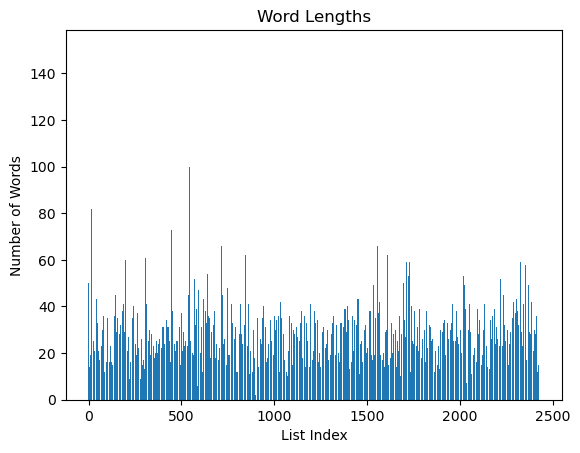

In [18]:
import matplotlib.pyplot as plt
def count_word_lengths(words_list_of_lists):
    word_lengths = []
    for words_list in words_list_of_lists:
        word_lengths.append(len(words_list))
    return word_lengths

def plot_word_lengths(word_lengths):
    x = list(range(len(word_lengths)))
    y = word_lengths
    plt.bar(x, y)
    plt.xlabel('List Index')
    plt.ylabel('Number of Words')
    plt.title('Word Lengths')
    plt.show()

words_list_of_lists = corpus
word_lengths = count_word_lengths(words_list_of_lists)
plot_word_lengths(word_lengths)

In [19]:
import matplotlib.pyplot as plt

def count_words(words_list_of_lists):
    word_counts = {}
    for words_list in words_list_of_lists:
        for word in words_list:
            if word in word_counts:
                word_counts[word] += 1
            else:
                word_counts[word] = 1
    return word_counts
common_words = []
def plot_top_words(word_counts, top_n=50):
    sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    return common_words.append([word for word, count in sorted_word_counts[:top_n]])
    x = [word for word, count in sorted_word_counts[:top_n]]
    y = [count for word, count in sorted_word_counts[:top_n]]
    plt.bar(x, y)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Top 10 Words')
    plt.show()

words_list_of_lists = corpus
word_counts = count_words(words_list_of_lists)
plot_top_words(word_counts)

In [20]:
common_words

[['company',
  'service',
  'product',
  'provider',
  'offer',
  'manufacturer',
  'system',
  'management',
  'provides',
  'business',
  'customer',
  'enabling',
  'industry',
  'technology',
  'solution',
  'intended',
  'market',
  'equipment',
  'based',
  'including',
  'software',
  'operator',
  'network',
  'client',
  'well',
  'data',
  'united',
  'also',
  'include',
  'range',
  'care',
  'application',
  'operates',
  'industrial',
  'food',
  'platform',
  'design',
  'development',
  'communication',
  'developer',
  'group',
  'state',
  'support',
  'segment',
  'home',
  'brand',
  'commercial',
  'manufacturing',
  'inc',
  'manufacture']]

In [21]:
def remove_common_words(txt_tokenized):
    txt_cleanest = [word for word in txt_tokenized if word not in common_words]
    return txt_cleanest

df['Description_no_cw'] = df['Description_lemmatized'].apply(lambda x: remove_common_words(x))
df.head()

,ï»¿Company ID,Company Name,Industry (ICB),Region,Year,PE Firm,PE/VC,URL of the Transaction,Description,Description_Clean,Description_Clean_Tokenized,Description_no_sw,Description_stemmed,Description_lemmatized,Description_no_cw
0,6479,Sabre,NaN,NaN,2006,Silver Lake,NaN,https://www.sabre.com/insights/releases/sabre-...,Sabre is a technology solutions provider to th...,Sabre is a technology solutions provider to th...,"[sabre, is, a, technology, solutions, provider...","[sabre, technology, solutions, provider, globa...","[sabr, technolog, solut, provid, global, trave...","[sabre, technology, solution, provider, global...","[sabre, technology, solution, provider, global..."
1,6612,SABRELINER CORPATION,NaN,UNited States,NaN,NaN,NaN,https://www.aviationpros.com/aircraft/maintena...,Sabreliner Corporation is a diversified aviati...,Sabreliner Corporation is a diversified aviati...,"[sabreliner, corporation, is, a, diversified, ...","[sabreliner, corporation, diversified, aviatio...","[sabrelin, corpor, diversifi, aviat, servic, c...","[sabreliner, corporation, diversified, aviatio...","[sabreliner, corporation, diversified, aviatio..."
2,13804,Sabroe Refrigeration,Industrial Manufacturing,Denmark,1999,York International Corp.,NaN,https://www.wsj.com/articles/SB922585201513969274,"Sabroe Refrigeration, a manufacturing of indus...",Sabroe Refrigeration a manufacturing of indust...,"[sabroe, refrigeration, a, manufacturing, of, ...","[sabroe, refrigeration, manufacturing, industr...","[sabro, refriger, manufactur, industri, compre...","[sabroe, refrigeration, manufacturing, industr...","[sabroe, refrigeration, manufacturing, industr..."
3,5080,Saeco/Saeco International Group?,"Industrial,Manufacturing,Packaging Service",Spain,2004,PAI Partners,NaN,https://www.unquote.com/france/news/83535/pai-...,Saeco is a company founded in Molina de Segura...,Saeco is a company founded in Molina de Segura...,"[saeco, is, a, company, founded, in, molina, d...","[saeco, company, founded, molina, de, segura, ...","[saeco, compani, found, molina, de, segura, 19...","[saeco, company, founded, molina, de, segura, ...","[saeco, company, founded, molina, de, segura, ..."
4,25085,Safe Traffic/ RoadSafe Traffic,Other Commercial Services,UNited States,2021,"Trilantic North America , Investcorp Internati...",NaN,https://www.trilanticnorthamerica.com/portfoli...,Provider of traffic safety services and produc...,Provider of traffic safety services and produc...,"[provider, of, traffic, safety, services, and,...","[provider, traffic, safety, services, products...","[provid, traffic, safeti, servic, product, int...","[provider, traffic, safety, service, product, ...","[provider, traffic, safety, service, product, ..."


In [25]:
new_corpus = list(df['Description_no_cw'])
plt.rcParams["font.family"] = "Times New Roman"

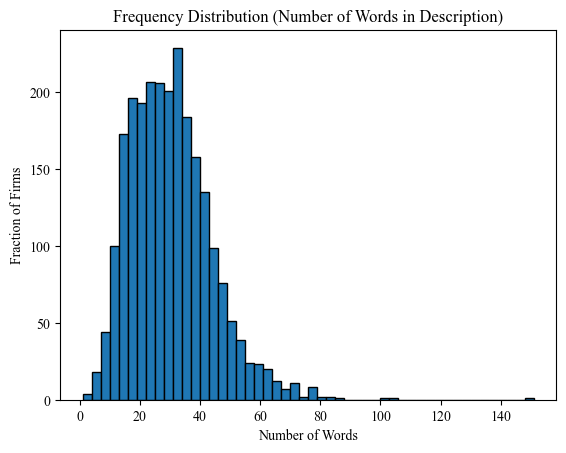

In [26]:
def count_word_lengths(product_descriptions):
    word_lengths = []
    for description in product_descriptions:
        word_lengths.append(len(description))
    return word_lengths

def plot_word_lengths(word_lengths):
    plt.hist(word_lengths, bins=50, edgecolor='black')
    plt.xlabel('Number of Words')
    plt.ylabel('Fraction of Firms')
    plt.title('Frequency Distribution (Number of Words in Description)')
    plt.savefig('Frequency Distribution (Number of Words in Description).pdf')
    plt.show()

product_descriptions = new_corpus
word_lengths = count_word_lengths(product_descriptions)
plot_word_lengths(word_lengths)

In [24]:
def count_words(words_list_of_lists):
    word_counts = {}
    for words_list in words_list_of_lists:
        for word in words_list:
            if word in word_counts:
                word_counts[word] += 1
            else:
                word_counts[word] = 1
    return word_counts

def get_common_words(word_counts, threshold=0.2):
    common_words = []
    total_lists = len(words_list_of_lists)
    for word, count in word_counts.items():
        if count / total_lists >= threshold:
            common_words.append((word, count))
    return common_words

words_list_of_lists = new_corpus
word_counts = count_words(words_list_of_lists)
common_words = get_common_words(word_counts)
print(common_words)


[('provider', 847), ('offer', 707), ('management', 510), ('company', 2253), ('service', 1926), ('product', 1265), ('system', 515), ('manufacturer', 536)]


In [28]:
token_lens = []
for txt in list(corpus):
    tokens = tokenizer.encode(txt, max_length=284, truncation=True)
    token_lens.append(len(tokens))

NameError: name 'tokenizer' is not defined

In [ ]:
sns.displot(token_lens)
plt.xlim([0, 284])
plt.xlabel('Token count')
plt.show()
print("Longest Product Description (Number Tokens): " , max(token_lens))

In [21]:
corpus = list(df['Description_lemmatized'])

In [22]:
corpus_embeddings = embedder.encode(corpus)

In [23]:
corpus_embeddings

array([[-0.06273337, -0.15679383,  1.6048247 , ...,  0.18092652,
        -0.35323995, -0.05922194],
       [-0.06036899, -0.21403952,  1.3640907 , ...,  0.12944102,
        -0.5093053 , -0.05458902],
       [-0.12717433, -0.14122023,  1.5826641 , ..., -0.23033978,
        -0.29064956, -0.0490262 ],
       ...,
       [ 0.46895638, -0.3645974 ,  1.8392308 , ..., -0.035936  ,
        -0.54560924, -0.300011  ],
       [-0.19109531,  0.03425106,  1.7468147 , ..., -0.3414362 ,
        -0.35655865, -0.17146194],
       [ 0.13776596, -0.29256275,  2.0995684 , ..., -0.42766356,
        -0.65626276,  0.05569714]], dtype=float32)

In [24]:
num_clusters = 300
clustering_model = KMeans(n_clusters= num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

In [25]:
cluster_assignment

array([ 79, 271, 142, ...,  17,  50,  12], dtype=int32)

In [26]:
#cluster_df = pd.DataFrame(corpus,columns = ['corpus'])
#cluster_df['cluster'] = cluster_assignment
#cluster_df.head()

In [27]:
#df_corpus = pd.DataFrame(list(zip(corpus, Company)), columns=['corpus'])
df['cluster'] = cluster_assignment
df.head()

,Company ID,Company Name,Industry (ICB),Region,Year,PE Firm,PE/VC,URL of the Transaction,Description,Description_Clean,Description_Clean_Tokenized,Description_no_sw,Description_stemmed,Description_lemmatized,cluster
0,6479,Sabre,NaN,NaN,2006.0,Silver Lake,NaN,https://www.sabre.com/insights/releases/sabre-...,Sabre is a technology solutions provider to th...,Sabre is a technology solutions provider to th...,"[sabre, is, a, technology, solutions, provider...","[sabre, technology, solutions, provider, globa...","[sabr, technolog, solut, provid, global, trave...","[sabre, technology, solution, provider, global...",79
2,13804,Sabroe Refrigeration,Industrial Manufacturing,Denmark,1999.0,York,NaN,https://www.wsj.com/articles/SB922585201513969274,"Sabroe Refrigeration, a manufacturing of indus...",Sabroe Refrigeration a manufacturing of indust...,"[sabroe, refrigeration, a, manufacturing, of, ...","[sabroe, refrigeration, manufacturing, industr...","[sabro, refriger, manufactur, industri, compre...","[sabroe, refrigeration, manufacturing, industr...",271
3,5080,Saeco/Saeco International Group?,"Industrial,Manufacturing,Packaging Service",Spain,NaN,NaN,NaN,NaN,Saeco is a company founded in Molina de Segura...,Saeco is a company founded in Molina de Segura...,"[saeco, is, a, company, founded, in, molina, d...","[saeco, company, founded, molina, de, segura, ...","[saeco, compani, found, molina, de, segura, 19...","[saeco, company, founded, molina, de, segura, ...",142
5,25607,"SafeBoot Holdings, BV",Enterprise Software,United States,2007.0,McAffee,NaN,https://www.helpnetsecurity.com/2007/11/20/mca...,SafeBoot provides software to protect mobile e...,SafeBoot provides software to protect mobile e...,"[safeboot, provides, software, to, protect, mo...","[safeboot, provides, software, protect, mobile...","[safeboot, provid, softwar, protect, mobil, en...","[safeboot, provides, software, protect, mobile...",169
6,6315,Safelite Glass Corp.,"Automotive, Professional Services",United States,2007.0,Belron International,NaN,https://www.bizjournals.com/columbus/stories/2...,"Safelite Group, Inc. is an American provider o...",Safelite Group Inc is an American provider of ...,"[safelite, group, inc, is, an, american, provi...","[safelite, group, inc, american, provider, veh...","[safelit, group, inc, american, provid, vehicl...","[safelite, group, inc, american, provider, veh...",151


In [28]:
clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
[['designer', 'manufacturer', 'manual', 'automatic', 'shutter', 'system', 'company', 'manufacture', 'shutter', 'system', 'made', 'extruded', 'plastic', 'aluminum', 'profile', 'offer', 'sun', 'protection', 'system', 'mosquito', 'mesh', 'window', 'residential', 'commercial', 'sector'], ['designer', 'producer', 'seller', 'integrated', 'service', 'equipment', 'software', 'product', 'field', 'data', 'acquisition', 'company', 'primarily', 'focus', 'access', 'control', 'management', 'time', 'data', 'collection', 'management', 'factory', 'shop', 'floor', 'data', 'acquisition'], ['manufacturer', 'designer', 'truck', 'trailer', 'product', 'intended', 'transportation', 'industry', 'company', 'product', 'include', 'onhighway', 'converter', 'dolly', 'rytle', 'system', 'composite', 'tanker', 'mobile', 'crane', 'various', 'tanker'], ['manufactorer', 'designer', 'wire', 'rope', 'rigging', 'service', 'based', 'la', 'vega', 'nevada', 'company', 'offer', 'full', 'range', 'conventional', 'custo

In [38]:
df.sort_values(by=['cluster'])

,Company ID,Company Name,Industry (ICB),Region,Year,PE Firm,PE/VC,URL of the Transaction,Description,Description_lemmatized,cluster
1004,20962,Suddekor,Forestry Processing,Germany,1998.0,Taros Capital,NaN,https://mergr.com/taros-capital-bv-invests-in-...,Designer and supplier of printed decorative pa...,"[designer, supplier, printed, decorative, pape...",0
1372,9504,Teufel,Electonics,Germany,2018.0,NAXICAP Partners,NaN,https://hgcapital.com/hg-agrees-sale-of-teufel...,"Designer, manufacturer and seller of speakers,...","[designer, manufacturer, seller, speaker, home...",0
449,2146,Silver Eagle Manufacturing Co,Road,United States,2006.0,Endeavour Capital,NaN,https://endeavour.com/ec/silver-eagle-manufact...,Manufacturer and designer of truck and trailer...,"[manufacturer, designer, truck, trailer, produ...",0
1006,50097,Suhyang,Clothing,South Korea,2013.0,AEA Investors,NaN,https://www.aeainvestors.com/portfolio/,Designer and retailer of children's apparel se...,"[designer, retailer, childrens, apparel, servi...",0
452,5927,Silver State/ Silver State Wire Rope and Rigging,Industrial Supplies and Parts,NaN,2022.0,NaN,NaN,https://www.pehub.com/altamont-backed-blp-acqu...,Manufactorer and designer of wire rope and rig...,"[manufactorer, designer, wire, rope, rigging, ...",0
...,...,...,...,...,...,...,...,...,...,...,...
344,5610,"Luxe Beauty Holdings, Inc. (Sexy Hair)",Personal Products,United States,2014.0,Henkel,NaN,https://www.henkel.com/spotlight/2014-06-02-he...,Manufacturer of hair beauty products. The comp...,"[manufacturer, hair, beauty, product, company,...",297
21,2962,"SAGE BROADCASTING, CORP.",Broadcasting,United States,NaN,NaN,NaN,NaN,Sage Broadcasting Co Inc is headquartered in H...,"[sage, broadcasting, co, inc, headquartered, h...",298
919,7881,Sterry Communications/ Sterry Telecom,Telecommunication Service Providers,UK,NaN,NaN,NaN,NaN,Sterry Telecom is one of the worlds biggest le...,"[sterry, telecom, one, world, biggest, leading...",298
22,25557,"Sage Telecom, Inc.",Telecommunication Services,United States,2007.0,Silver Point Capital,PE,https://www.venturecapitaljournal.com/silver-p...,"Sage Telecom, Inc. is known for providing cost...","[sage, telecom, inc, known, providing, costeff...",298


In [40]:
df = df.drop(['Description_stemmed', 'Description_no_sw','Description_Clean_Tokenized','Description_Clean'], axis=1, inplace=True)

KeyError: "['Description_stemmed' 'Description_no_sw' 'Description_Clean_Tokenized'\n 'Description_Clean'] not found in axis"

In [41]:
pd.DataFrame(df).to_excel("output.xlsx")